In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.axes_size import Fixed, Scaled
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle
import numpy as np

pgf_with_latex = { 
    "ytick.right":  True, # 
    "xtick.top":  True, # 
    "xtick.direction":  "in", # direction: {in, out, inout}
    "ytick.direction":  "in", # direction: {in, out, inout}
    "xtick.minor.visible": True,   # visibility of minor ticks on x-axis
    "ytick.minor.visible": True,   # visibility of minor ticks on y-axis
     "xtick.labelsize":15, 
     "ytick.labelsize":15,
     "xtick.major.size": 5,       # major tick size in points
     "ytick.major.size": 5,       # major tick size in points
     "xtick.minor.size": 2.5,     # major tick size in points
     "ytick.minor.size": 2.5,     # major tick size in points
     "xtick.major.width":   0.9,  # major tick width in points
     "ytick.major.width":   0.9,  # major tick width in points
     "figure.dpi":         300, 
     "font.size":         20, 
     "savefig.transparent": False,
#    "axes.labelsize": 30,
    # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],              # LaTeX default is 10pt font.            # Make the legend/label fonts a little smaller
    "pgf.preamble": r"\usepackage[ut f8x]{inputenc} \usepackage[T1]{fontenc}"   

}
mpl.rcParams.update(pgf_with_latex)



In [7]:
# Dolphot output is in Vega
magnitudes = {'HST/F475W':(24.06,0.05),
              'HST/F555W':(22.41,0.06),
              'HST/F814W':(22.41,0.06)} 

filters = list(magnitudes.keys())
print(filters)

['HST/F475W', 'HST/F555W', 'HST/F814W']


In [63]:
# step 1: The photometry in Vega magnitudes can be converted to units of either F_λ or F_ν.

# For F_ν, using the common AB magnitude system, then a source with a measured magnitude of zero
# in any band by definition has a reference flux of 3631 Jy, ie F0 is always 3631 Jy
# m_AB=-2.5*log10(F)+c
# c=0+2.5*log10(3631)
# c = -8.90006562228

# For Flux in units of Jy, and magnitude in units of mag
# F_ν(Jy)=10(23-(m_AB+48.6)/2.5)
# m_AB=-2.5*((23-log10(F_ν))-48.6)

# m_AB=-2.5*log_10(F_ν)+8.90
# (8.90-m_AB)/2.5=log_10(F_ν)
# F_ν=10^((8.90-m_AB)/2.5)

# for F_λ you can look up the flux of zero magnitude (F0) from: http://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse&gname=PAN-STARRS&asttype=

# F_ν = F_λ*(lambda^2/c) 
# F_λ (erg/cm^2/s/A) = F_ν (Jy)/(3.33564*10^(4)*(lambda(A)^2))


def vega_mag_2_fλ(mag, filt):
        #takes vega made and converts to fλ in units erg/cm^2/s/A
        
        list_zp={'WFC3_UVIS1/F475W':5.26539e-9,
                 'WFC3_UVIS1/F218W':4.72852e-9,
                 'WFC3_UVIS1/F814W':1.13481e-9,
                 'WFC3_UVIS1/F625W':2.43023e-9,
                 'WFC3_IR/F128N':2.48561e-10,
                 'WFC3_IR/F110W':4.00095e-10,
                 'WFC3_UVIS1/F555W':3.96448e-9} 
        
        return(list_zp[filt]*np.power(10,(mag)/-2.5))
    
def fλ_2_ab_mag(flux, filt):
        #fλ in units erg/cm^2/s/A converts to AB magnitude
        list_zp={'WFC3_UVIS1/F475W':4.778e-9,
                 'WFC3_UVIS1/F218W':2.19848e-8,
                 'WFC3_UVIS1/F814W':1.68438e-9,
                 'WFC3_UVIS1/F625W':2.79332e-9,
                 'WFC3_IR/F128N':6.60607e-10,
                 'WFC3_IR/F110W':8.18187e-10,
                 'WFC3_UVIS1/F555W':3.86293e-9} 
        return(-2.5*np.log10(flux/list_zp[filt]))  

In [62]:
#vega_mag_2_fλ(14, 'WFC3_UVIS1/F475W'),fλ_2_ab_mag(1.056537111389403e-16,'WFC3_UVIS1/F475W')

(1.322606169760624e-14, 19.13840347237199)

In [51]:
# e.g. http://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse&gname=HST&asttype=

#vega_mag=14
#print('vega',vega_mag)
#f=vega_mag_2_fλ(vega_mag,4.20615e-11)
#print(f)
#print('AB mag',fλ_2_ab_mag(f,2.33246e-10),fλ_2_ab_mag(f,2.33246e-10)-vega_mag)
#1.85

vega 14
1.056537111389403e-16
AB mag 15.859823620453641 1.859823620453641


In [ ]:
#zeropoints = {'HST/F475W':1,
#              'PS1/g':2 } 

#zp_Fλ_f475w=2.5*np.log10(4.778e-9)

#F2_λ_f475w=np.power(10,(zp_Fλ_f475w-magnitudes['HST/F475W'][0])/2.5)

#print('filt λ_ref m_AB F_λ (calculated from calculated from filter profile zeropoints)')
#print('F475W',4773.10,magnitudes['HST/F475W'][0],F2_λ_f475w,'(erg/cm^2/s/A)')

In [92]:
# step 2  - Apply Galactic extinction correction

# E(B-V) = 0.420
# R_V = 3.1$;  changes the shape of the extinction curve, rather than just the amplitude. A_V is linear scaling
# Cardelli, Clayton & Mathis (1989) R_V = 3.1
# R_V=A_V/E(B-V), where E(B-V) is the difference in extinction between the B and V bands 
# A_V = R_V * E(B-V) = 3.1 * 0.420 = 1.302
# "deredden" flux by 1.302
#dereddened_flux=remove(ccm89(wave, 1.302, 3.1), flux_p)
#extinction.fitzpatrick99(wave, 1.0, 3.1)

['HST/F475W', 'PS1/g']


In [96]:
# extinction correction

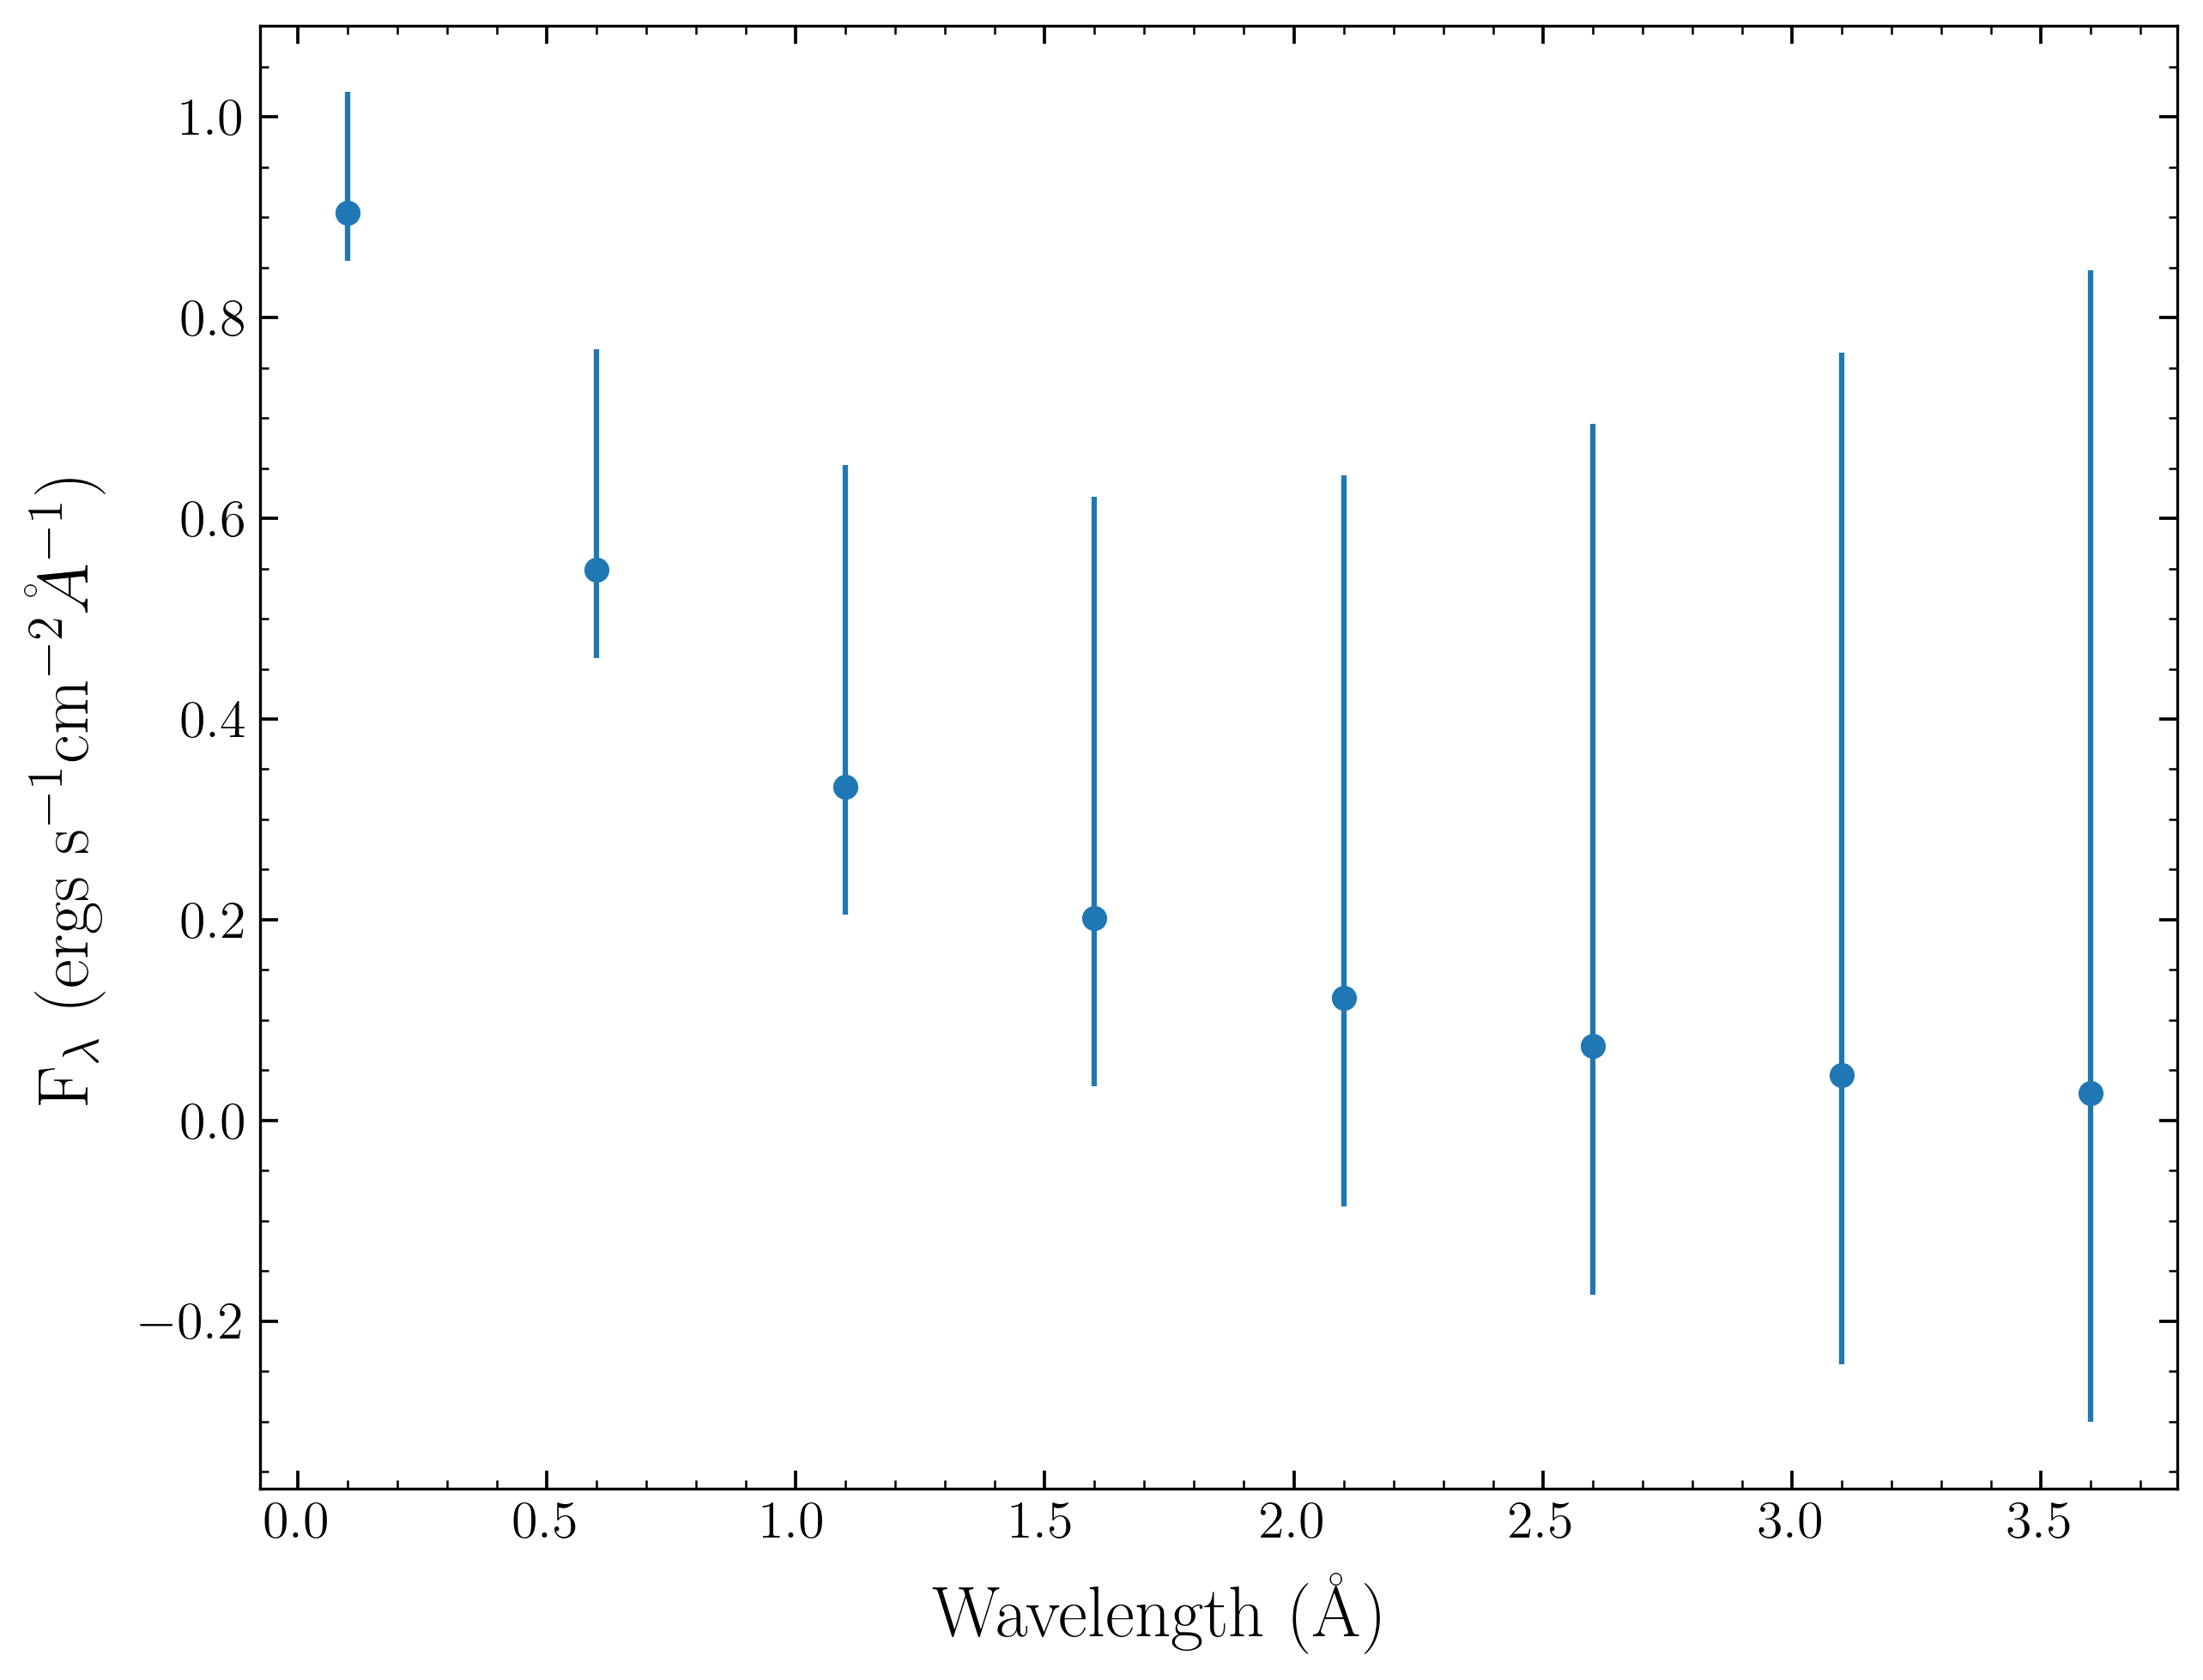

In [93]:
fig = plt.figure(constrained_layout=True,figsize=(8,6),facecolor='white')
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
error = 0.1 + 0.2 * x
lower_error = 0.4 * error
upper_error = error


asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, yerr=asymmetric_error, fmt='o')

fig.text(0.5, -0.05, r'Wavelength (\AA)', ha='center')
fig.text(-0.05, 0.5, r'F$_\lambda$ (ergs s$^{-1}$cm$^{-2}\AA^{-1}$)', va='center', rotation='vertical')

plt.savefig('2021sjt_SED_plot.png',bbox_inches='tight')

In [100]:
# Fit the pickles library! 
# https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/pickles/AA_README
# https://ui.adsabs.harvard.edu/abs/1998PASP..110..863P/abstract